In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

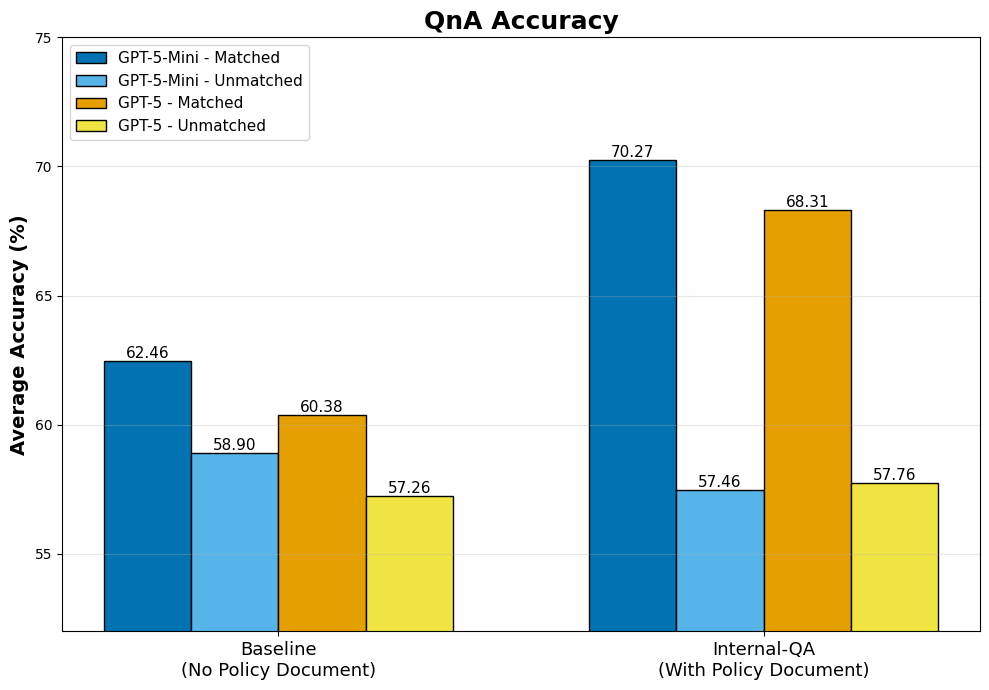

In [ ]:
data = {
    'Exp': ['Baseline', 'Baseline', 'Baseline', 'Baseline', 
            'Internal-QA', 'Internal-QA', 'Internal-QA', 'Internal-QA'],
    'Top_K': [1, 1, 3, 3, 1, 1, 3, 3],
    'Top_C': [10, 30, 10, 30, 10, 30, 10, 30],
    'GPT_5_Mini_Matched': [62.36, 62.96, 62.46, 62.06, 70.68, 74.07, 69.37, 66.94],
    'GPT_5_Matched': [60.19, 59.83, 59.16, 62.33, 69.14, 68.09, 69.07, 66.94],
    'GPT_5_Mini_Unmatched': [59.87, 58.23, 58.54, 58.98, 54.75, 53.87, 59.26, 61.97],
    'GPT_5_Unmatched': [56.11, 57.55, 56.76, 58.63, 55.55, 55.89, 58.21, 61.37]
}

df = pd.DataFrame(data)

baseline_avg = df[df['Exp'] == 'Baseline'][['GPT_5_Mini_Matched', 'GPT_5_Matched', 
                                              'GPT_5_Mini_Unmatched', 'GPT_5_Unmatched']].mean()
internal_qa_avg = df[df['Exp'] == 'Internal-QA'][['GPT_5_Mini_Matched', 'GPT_5_Matched', 
                                                     'GPT_5_Mini_Unmatched', 'GPT_5_Unmatched']].mean()

fig, ax = plt.subplots(figsize=(12, 7))

methods = ['Baseline\n(No Policy Document)', 'Internal-QA\n(With Policy Document)']

gpt5mini_matched = [baseline_avg['GPT_5_Mini_Matched'], internal_qa_avg['GPT_5_Mini_Matched']]
gpt5mini_unmatched = [baseline_avg['GPT_5_Mini_Unmatched'], internal_qa_avg['GPT_5_Mini_Unmatched']]
gpt5_matched = [baseline_avg['GPT_5_Matched'], internal_qa_avg['GPT_5_Matched']]
gpt5_unmatched = [baseline_avg['GPT_5_Unmatched'], internal_qa_avg['GPT_5_Unmatched']]

x = np.arange(len(methods))
width = 0.18

bars1 = ax.bar(x - 1.5*width, gpt5mini_matched, width, label='GPT-5-Mini - Matched', 
               color='#0173B2', edgecolor='black', linewidth=1)  
bars2 = ax.bar(x - 0.5*width, gpt5mini_unmatched, width, label='GPT-5-Mini - Unmatched', 
               color='#56B4E9', edgecolor='black', linewidth=1)  
bars3 = ax.bar(x + 0.5*width, gpt5_matched, width, label='GPT-5 - Matched', 
               color='#E69F00', edgecolor='black', linewidth=1)  
bars4 = ax.bar(x + 1.5*width, gpt5_unmatched, width, label='GPT-5 - Unmatched', 
               color='#F0E442', edgecolor='black', linewidth=1) 

ax.set_ylabel('Average Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_title('QnA Accuracy', fontsize=18, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(methods, fontsize=13)
ax.legend(fontsize=11, loc='upper left')
ax.set_ylim(52, 75)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.2f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

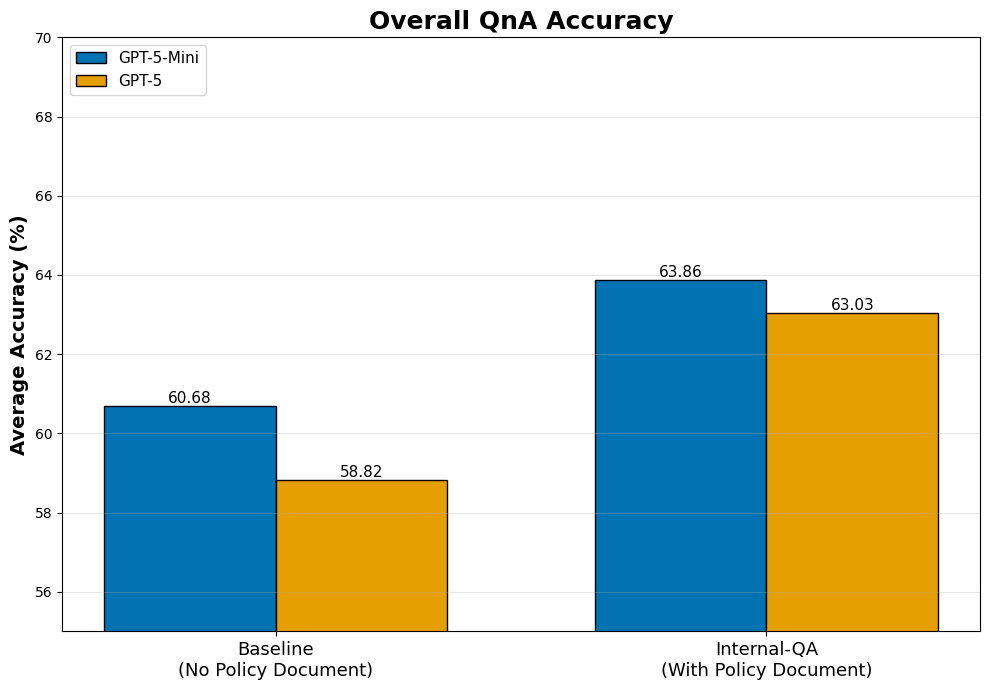

In [ ]:
# GPT-5-Mini 전체 평균 (Matched + Unmatched)
baseline_gpt5mini = df[df['Exp'] == 'Baseline'][['GPT_5_Mini_Matched', 'GPT_5_Mini_Unmatched']].values.flatten().mean()
internal_gpt5mini = df[df['Exp'] == 'Internal-QA'][['GPT_5_Mini_Matched', 'GPT_5_Mini_Unmatched']].values.flatten().mean()

# GPT-5 전체 평균 (Matched + Unmatched)
baseline_gpt5 = df[df['Exp'] == 'Baseline'][['GPT_5_Matched', 'GPT_5_Unmatched']].values.flatten().mean()
internal_gpt5 = df[df['Exp'] == 'Internal-QA'][['GPT_5_Matched', 'GPT_5_Unmatched']].values.flatten().mean()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 7))

methods = ['Baseline\n(No Policy Document)', 'Internal-QA\n(With Policy Document)']

gpt5mini_avg = [baseline_gpt5mini, internal_gpt5mini]
gpt5_avg = [baseline_gpt5, internal_gpt5]

x = np.arange(len(methods))
width = 0.35

bars1 = ax.bar(x - width/2, gpt5mini_avg, width, label='GPT-5-Mini', 
               color='#0173B2', edgecolor='black', linewidth=1)
bars2 = ax.bar(x + width/2, gpt5_avg, width, label='GPT-5', 
               color='#E69F00', edgecolor='black', linewidth=1)

ax.set_ylabel('Average Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_title('Overall QnA Accuracy', fontsize=18, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(methods, fontsize=13)
ax.legend(fontsize=11, loc='upper left')
ax.set_ylim(55, 70)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.2f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

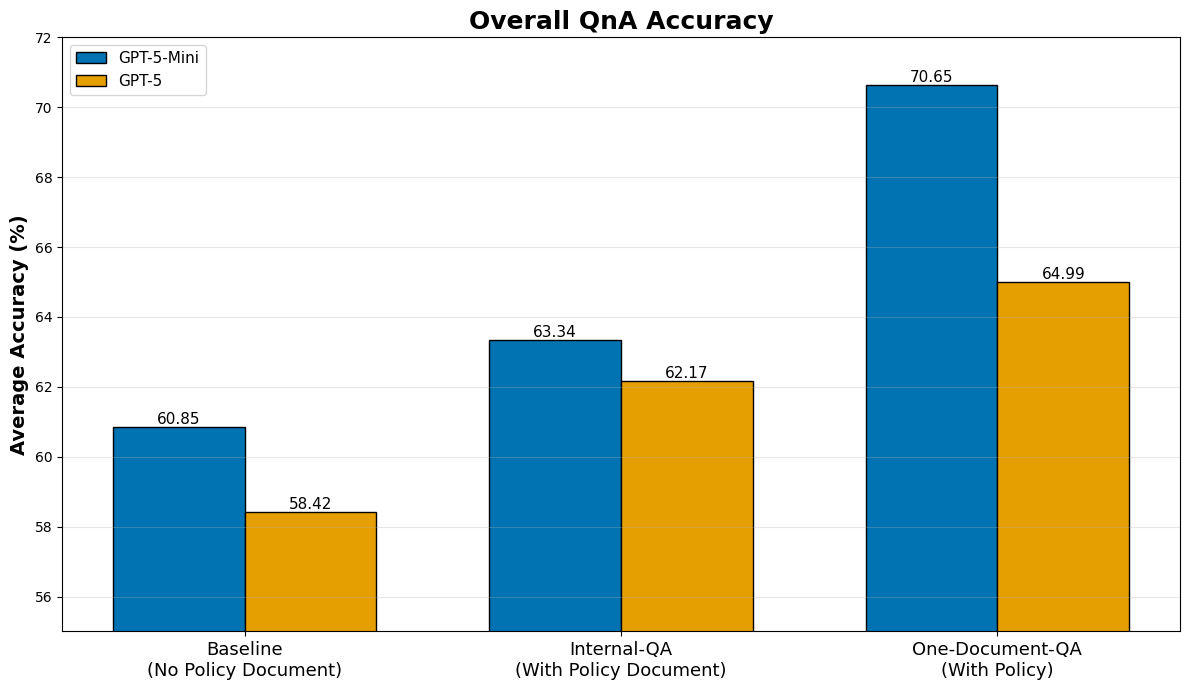

In [6]:
# Top_K=1인 데이터만 필터링
df_top1 = df[df['Top_K'] == 1]

# GPT-5-Mini 전체 평균 (Matched + Unmatched, Top_K=1만)
baseline_gpt5mini = df_top1[df_top1['Exp'] == 'Baseline'][['GPT_5_Mini_Matched', 'GPT_5_Mini_Unmatched']].values.flatten().mean()
internal_gpt5mini = df_top1[df_top1['Exp'] == 'Internal-QA'][['GPT_5_Mini_Matched', 'GPT_5_Mini_Unmatched']].values.flatten().mean()
onedoc_gpt5mini = 70.65

# GPT-5 전체 평균 (Matched + Unmatched, Top_K=1만)
baseline_gpt5 = df_top1[df_top1['Exp'] == 'Baseline'][['GPT_5_Matched', 'GPT_5_Unmatched']].values.flatten().mean()
internal_gpt5 = df_top1[df_top1['Exp'] == 'Internal-QA'][['GPT_5_Matched', 'GPT_5_Unmatched']].values.flatten().mean()
onedoc_gpt5 = 64.99

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 7))

methods = ['Baseline\n(No Policy Document)', 'Internal-QA\n(With Policy Document)', 'One-Document-QA\n(With Policy)']

gpt5mini_avg = [baseline_gpt5mini, internal_gpt5mini, onedoc_gpt5mini]
gpt5_avg = [baseline_gpt5, internal_gpt5, onedoc_gpt5]

x = np.arange(len(methods))
width = 0.35

bars1 = ax.bar(x - width/2, gpt5mini_avg, width, label='GPT-5-Mini', 
               color='#0173B2', edgecolor='black', linewidth=1)
bars2 = ax.bar(x + width/2, gpt5_avg, width, label='GPT-5', 
               color='#E69F00', edgecolor='black', linewidth=1)

ax.set_ylabel('Average Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_title('Overall QnA Accuracy', fontsize=18, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(methods, fontsize=13)
ax.legend(fontsize=11, loc='upper left')
ax.set_ylim(55, 72)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.2f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

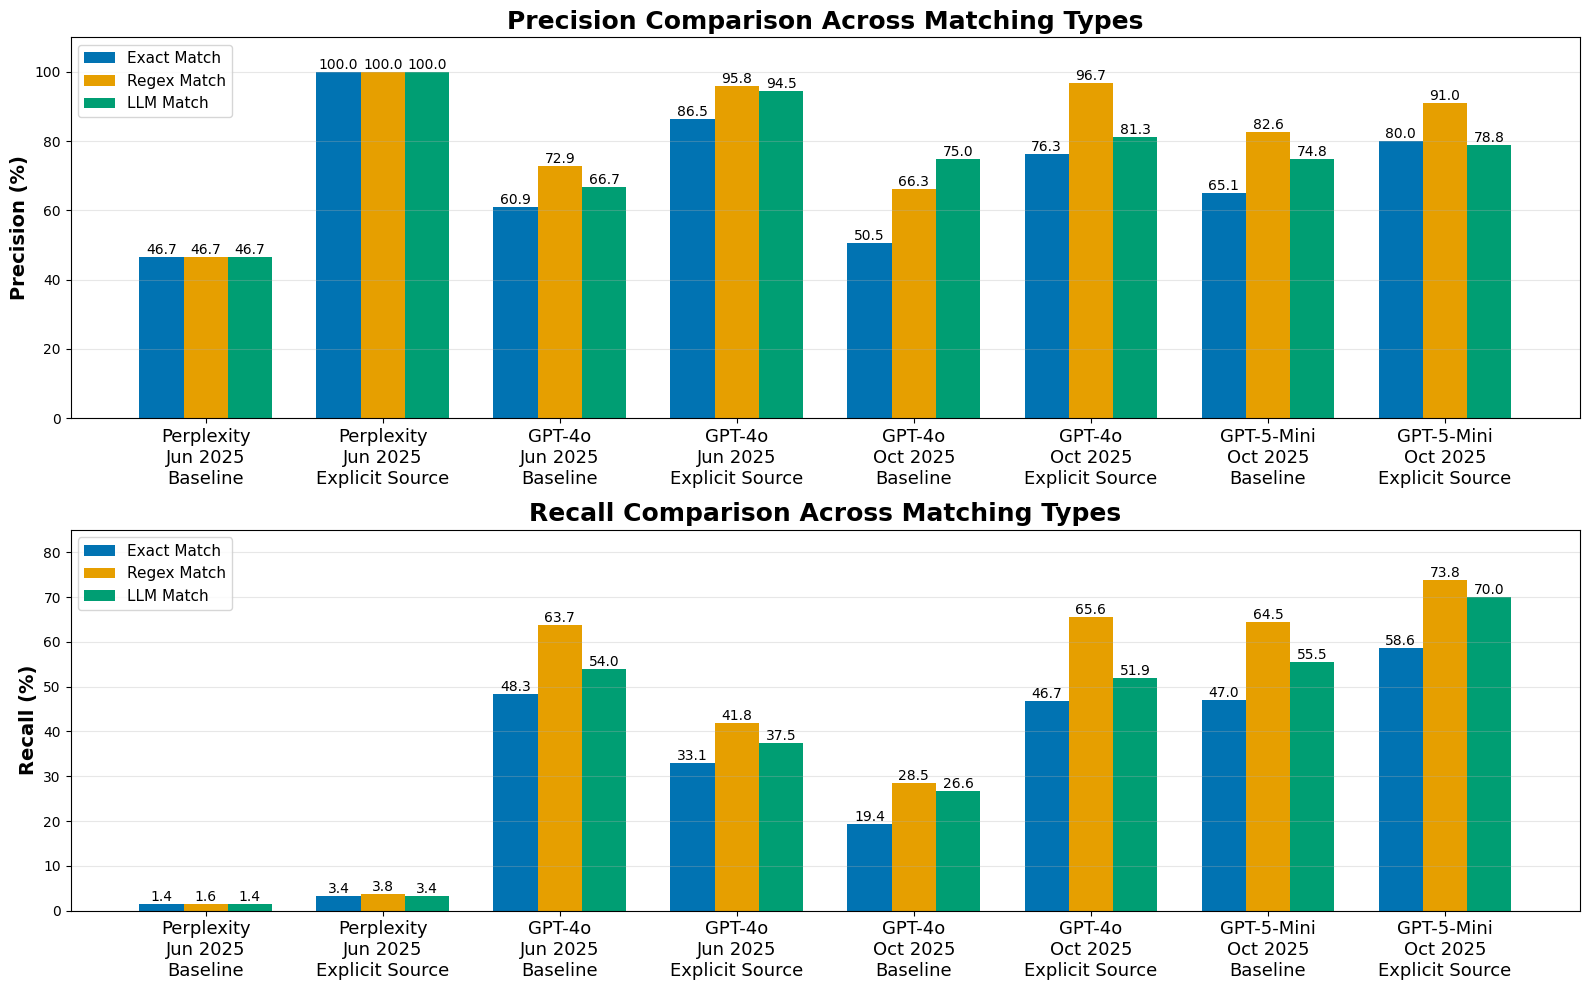

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Data for Precision
categories = ['Perplexity\nJun 2025\nBaseline', 'Perplexity\nJun 2025\nExplicit Source',
              'GPT-4o\nJun 2025\nBaseline', 'GPT-4o\nJun 2025\nExplicit Source',
              'GPT-4o\nOct 2025\nBaseline', 'GPT-4o\nOct 2025\nExplicit Source',
              'GPT-5-Mini\nOct 2025\nBaseline', 'GPT-5-Mini\nOct 2025\nExplicit Source']

exact_precision = [46.67, 100.0, 60.94, 86.45, 50.48, 76.26, 65.10, 79.99]
regex_precision = [46.67, 100.0, 72.91, 95.84, 66.30, 96.74, 82.60, 91.01]
llm_precision = [46.67, 100.0, 66.67, 94.51, 74.96, 81.34, 74.76, 78.77]

x = np.arange(len(categories))
width = 0.25

bars1 = ax1.bar(x - width, exact_precision, width, label='Exact Match', color='#0173B2')
bars2 = ax1.bar(x, regex_precision, width, label='Regex Match', color='#E69F00')
bars3 = ax1.bar(x + width, llm_precision, width, label='LLM Match', color='#009E73')

ax1.set_ylabel('Precision (%)', fontsize=14, fontweight='bold')
ax1.set_title('Precision Comparison Across Matching Types', fontsize=18, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categories, fontsize=13)
ax1.legend(fontsize=11)
ax1.set_ylim(0, 110)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# Data for Recall
exact_recall = [1.40, 3.35, 48.26, 33.06, 19.39, 46.72, 47.00, 58.58]
regex_recall = [1.57, 3.76, 63.69, 41.78, 28.48, 65.57, 64.48, 73.78]
llm_recall = [1.40, 3.35, 53.98, 37.52, 26.64, 51.88, 55.51, 70.01]

bars4 = ax2.bar(x - width, exact_recall, width, label='Exact Match', color='#0173B2')
bars5 = ax2.bar(x, regex_recall, width, label='Regex Match', color='#E69F00')
bars6 = ax2.bar(x + width, llm_recall, width, label='LLM Match', color='#009E73')

ax2.set_ylabel('Recall (%)', fontsize=14, fontweight='bold')
ax2.set_title('Recall Comparison Across Matching Types', fontsize=18, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(categories, fontsize=13)
ax2.legend(fontsize=11)
ax2.set_ylim(0, 85)
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars4, bars5, bars6]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
baseline = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/eval/overall_question_accuracy_baseline.csv')
rag = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/eval/overall_question_accuracy_rag.csv')
one_doc = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/one_doc/eval/overall_question_accuracy_withgpt4o.csv')
baseline_unmatched = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/eval/all_baseline_question_accuracy.csv')
rag_unmatched = pd.read_csv('/home/cptaswadu/new-rescue/RESCUE-n8n/eval/insurance/results/LLM_QnA/RAG/eval/all_sentence_unmatched_question_accuracy.csv')


x = np.arange(len(baseline['question']))
width = 0.25


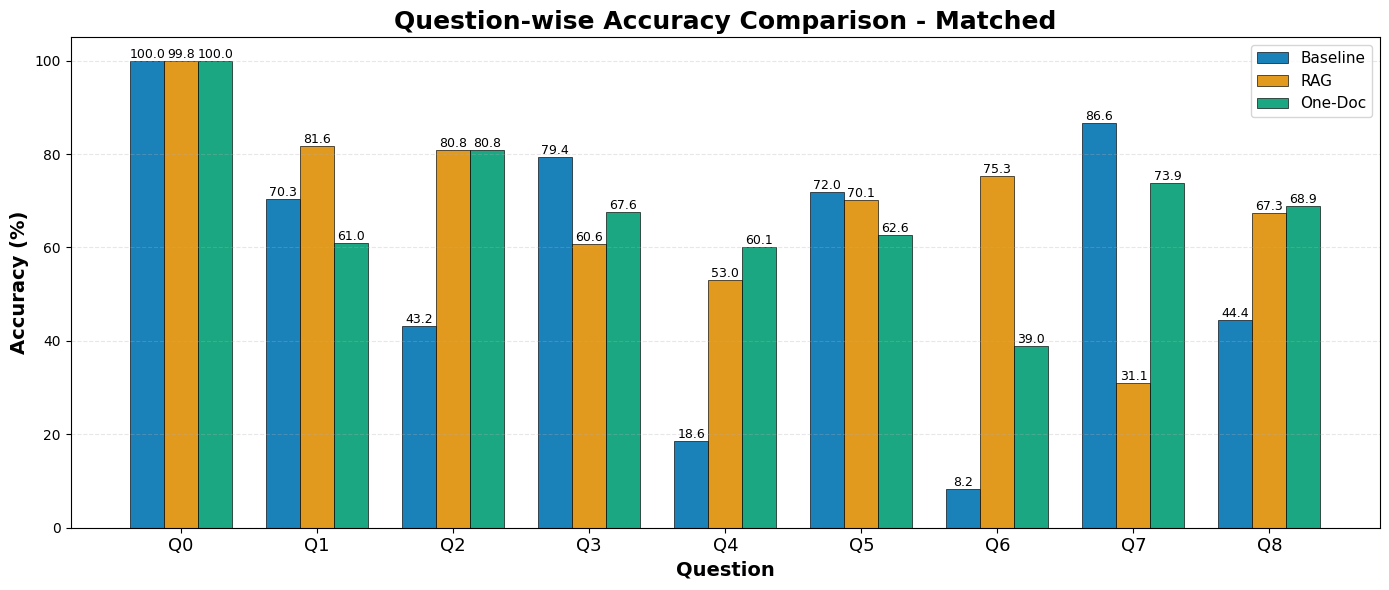

In [15]:
plt.figure(figsize=(14, 6))

bars1 = plt.bar(x - width, baseline['accuracy'], width, label='Baseline', color='#0173B2', alpha=0.9, edgecolor='black', linewidth=0.5)
bars2 = plt.bar(x, rag['accuracy'], width, label='RAG', color='#DE8F05', alpha=0.9, edgecolor='black', linewidth=0.5)
bars3 = plt.bar(x + width, one_doc['accuracy'], width, label='One-Doc', color='#029E73', alpha=0.9, edgecolor='black', linewidth=0.5)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)
        
plt.xlabel('Question', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
plt.title('Question-wise Accuracy Comparison - Matched', fontsize=18, fontweight='bold')
plt.xticks(x, baseline['question'], fontsize=13)
plt.legend(fontsize=11, loc='best')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, 105)

plt.tight_layout()
#plt.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

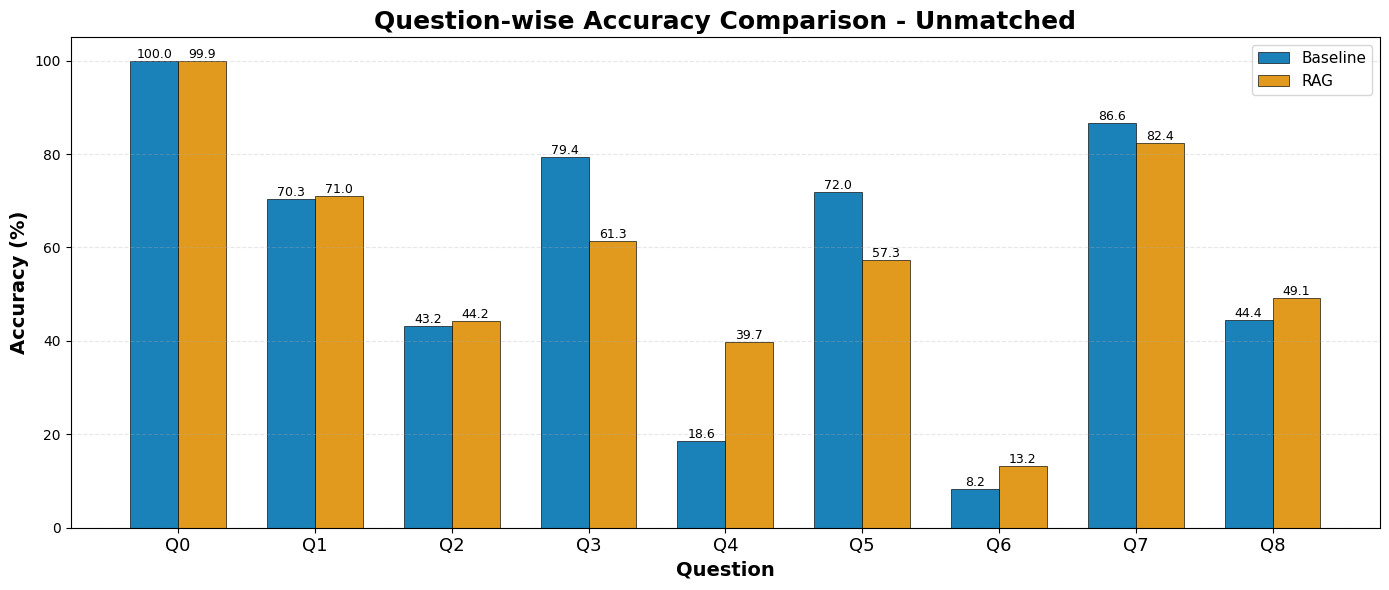

In [ ]:

x = np.arange(len(baseline_unmatched['question']))
width = 0.35

plt.figure(figsize=(14, 6))
bars4 = plt.bar(x - width/2, baseline_unmatched['accuracy'], width, 
        label='Baseline', color='#0173B2', alpha=0.9, 
        edgecolor='black', linewidth=0.5)
bars5 = plt.bar(x + width/2, rag_unmatched['accuracy'], width, 
        label='RAG', color='#DE8F05', alpha=0.9, 
        edgecolor='black', linewidth=0.5)

for bars in [bars4, bars5]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Question', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
plt.title('Question-wise Accuracy Comparison - Unmatched', fontsize=18, fontweight='bold')
plt.xticks(x, baseline_unmatched['question'], fontsize=13)
plt.legend(fontsize=11, loc='best')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, 105)

plt.tight_layout()
#plt.savefig('accuracy_comparison_unmatched.png', dpi=300, bbox_inches='tight')
plt.show()


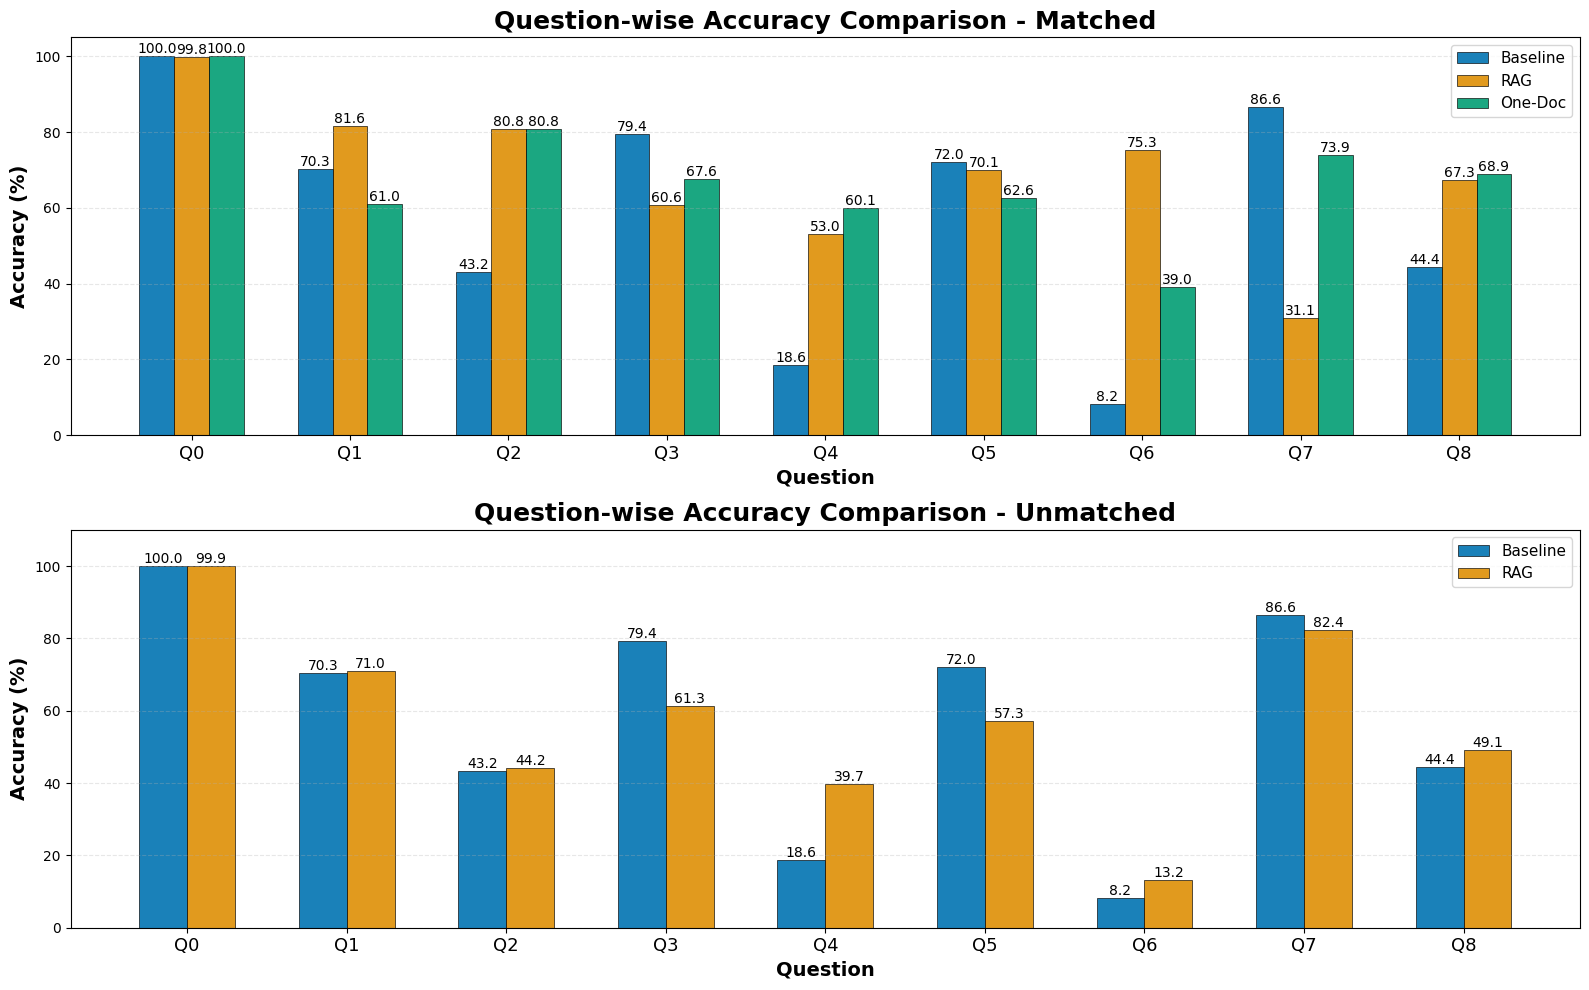

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# 위: Matched
x = np.arange(len(baseline['question']))
width = 0.22

bars1 = ax1.bar(x - width, baseline['accuracy'], width, label='Baseline', color='#0173B2', alpha=0.9, edgecolor='black', linewidth=0.5)
bars2 = ax1.bar(x, rag['accuracy'], width, label='RAG', color='#DE8F05', alpha=0.9, edgecolor='black', linewidth=0.5)
bars3 = ax1.bar(x + width, one_doc['accuracy'], width, label='One-Doc', color='#029E73', alpha=0.9, edgecolor='black', linewidth=0.5)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=10)

ax1.set_xlabel('Question', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax1.set_title('Question-wise Accuracy Comparison - Matched', fontsize=18, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(baseline['question'], fontsize=13)
ax1.legend(fontsize=11, loc='best')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim(0, 105)

# 아래: Unmatched
x_unmatched = np.arange(len(baseline_unmatched['question']))
width_unmatched = 0.3

bars4 = ax2.bar(x_unmatched - width_unmatched/2, baseline_unmatched['accuracy'], width_unmatched, 
        label='Baseline', color='#0173B2', alpha=0.9, 
        edgecolor='black', linewidth=0.5)
bars5 = ax2.bar(x_unmatched + width_unmatched/2, rag_unmatched['accuracy'], width_unmatched, 
        label='RAG', color='#DE8F05', alpha=0.9, 
        edgecolor='black', linewidth=0.5)

for bars in [bars4, bars5]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=10)

ax2.set_xlabel('Question', fontsize=14, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax2.set_title('Question-wise Accuracy Comparison - Unmatched', fontsize=18, fontweight='bold')
ax2.set_xticks(x_unmatched)
ax2.set_xticklabels(baseline_unmatched['question'], fontsize=13)
ax2.legend(fontsize=11, loc='best')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim(0, 110)

plt.tight_layout()
plt.show()

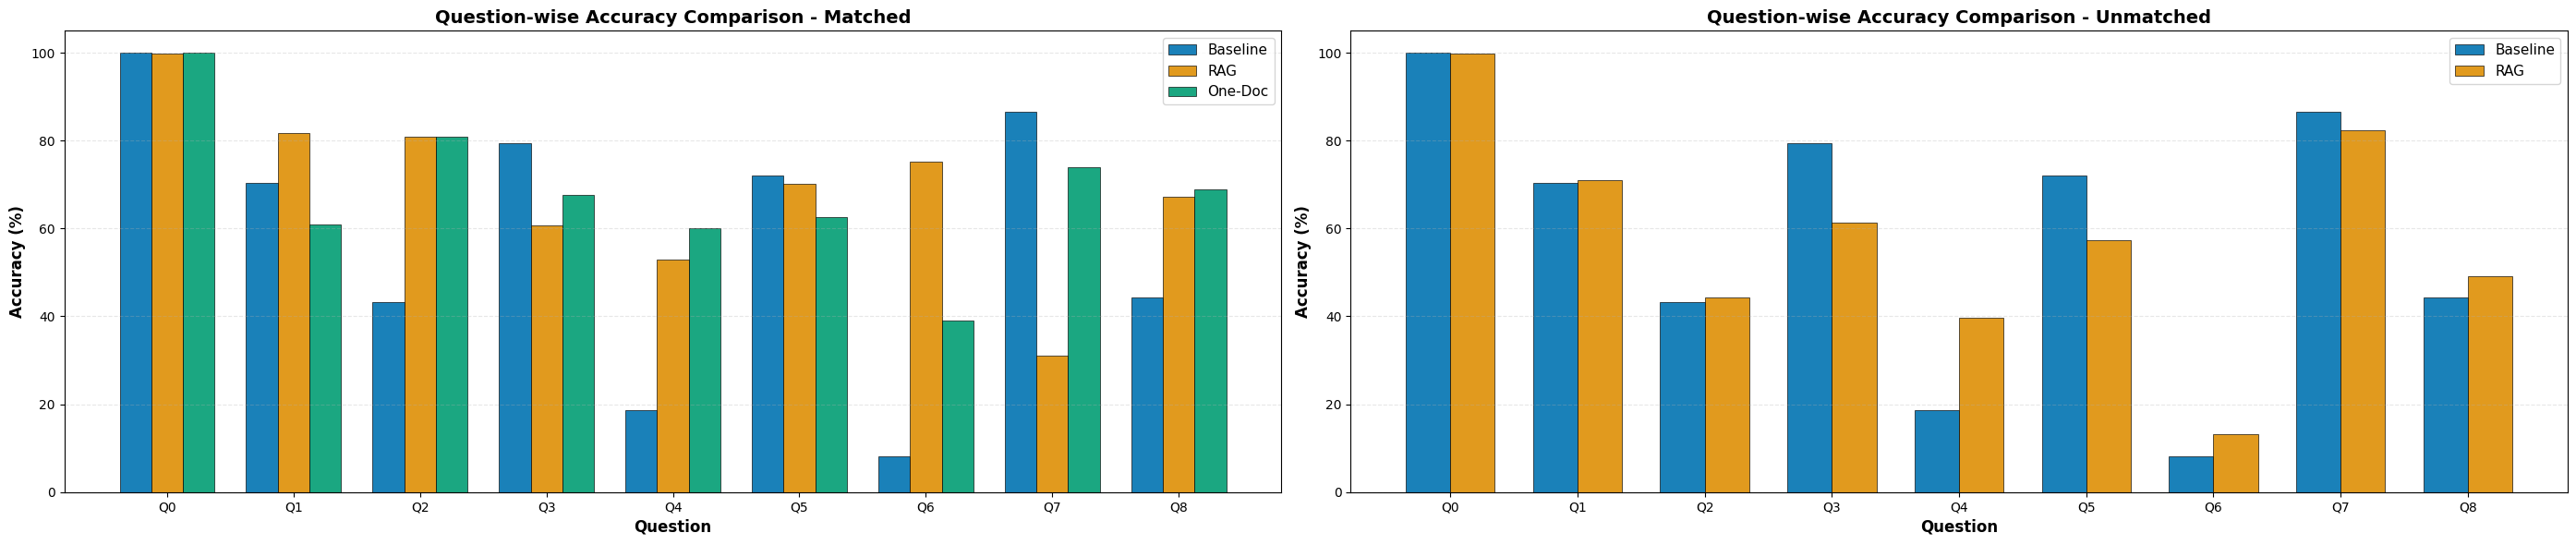

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 6))

# ========== Left: Matched ==========
x = np.arange(len(baseline['question']))
width = 0.25

ax1.bar(x - width, baseline['accuracy'], width, label='Baseline', 
        color='#0173B2', alpha=0.9, edgecolor='black', linewidth=0.5)
ax1.bar(x, rag['accuracy'], width, label='RAG', 
        color='#DE8F05', alpha=0.9, edgecolor='black', linewidth=0.5)
ax1.bar(x + width, one_doc['accuracy'], width, label='One-Doc', 
        color='#029E73', alpha=0.9, edgecolor='black', linewidth=0.5)

ax1.set_xlabel('Question', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Question-wise Accuracy Comparison - Matched', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(baseline['question'], fontsize=10)
ax1.legend(fontsize=11, loc='best')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim(0, 105)

# ========== Right: Unmatched ==========
x_unmatched = np.arange(len(baseline_unmatched['question']))
width_unmatched = 0.35

ax2.bar(x_unmatched - width_unmatched/2, baseline_unmatched['accuracy'], width_unmatched, 
        label='Baseline', color='#0173B2', alpha=0.9, edgecolor='black', linewidth=0.5)
ax2.bar(x_unmatched + width_unmatched/2, rag_unmatched['accuracy'], width_unmatched, 
        label='RAG', color='#DE8F05', alpha=0.9, edgecolor='black', linewidth=0.5)

ax2.set_xlabel('Question', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax2.set_title('Question-wise Accuracy Comparison - Unmatched', fontsize=14, fontweight='bold')
ax2.set_xticks(x_unmatched)
ax2.set_xticklabels(baseline_unmatched['question'], fontsize=10)
ax2.legend(fontsize=11, loc='best')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim(0, 105)

plt.tight_layout()
plt.savefig('accuracy_comparison_combined.png', dpi=300, bbox_inches='tight')
plt.show()